In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/

fatal: destination path 'master' already exists and is not an empty directory.


In [0]:
!ls master

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

import pickle
import cv2

Using TensorFlow backend.


In [0]:
with open('master/train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('master/test.p', 'rb') as f:
    test_data = pickle.load(f)

with open('master/valid.p', 'rb') as f:
    val_data = pickle.load(f)

In [0]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

In [0]:
signnames = pd.read_csv('master/signnames.csv')
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


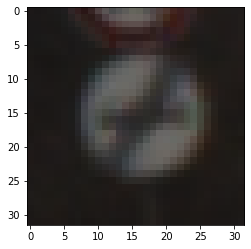

In [0]:
plt.imshow(X_train[1])

0  :  180
1  :  1980
2  :  2010
3  :  1260
4  :  1770
5  :  1650
6  :  360
7  :  1290
8  :  1260
9  :  1320
10  :  1800
11  :  1170
12  :  1890
13  :  1920
14  :  690
15  :  540
16  :  360
17  :  990
18  :  1080
19  :  180
20  :  300
21  :  270
22  :  330
23  :  450
24  :  240
25  :  1350
26  :  540
27  :  210
28  :  480
29  :  240
30  :  390
31  :  690
32  :  210
33  :  599
34  :  360
35  :  1080
36  :  330
37  :  180
38  :  1860
39  :  270
40  :  300
41  :  210
42  :  210


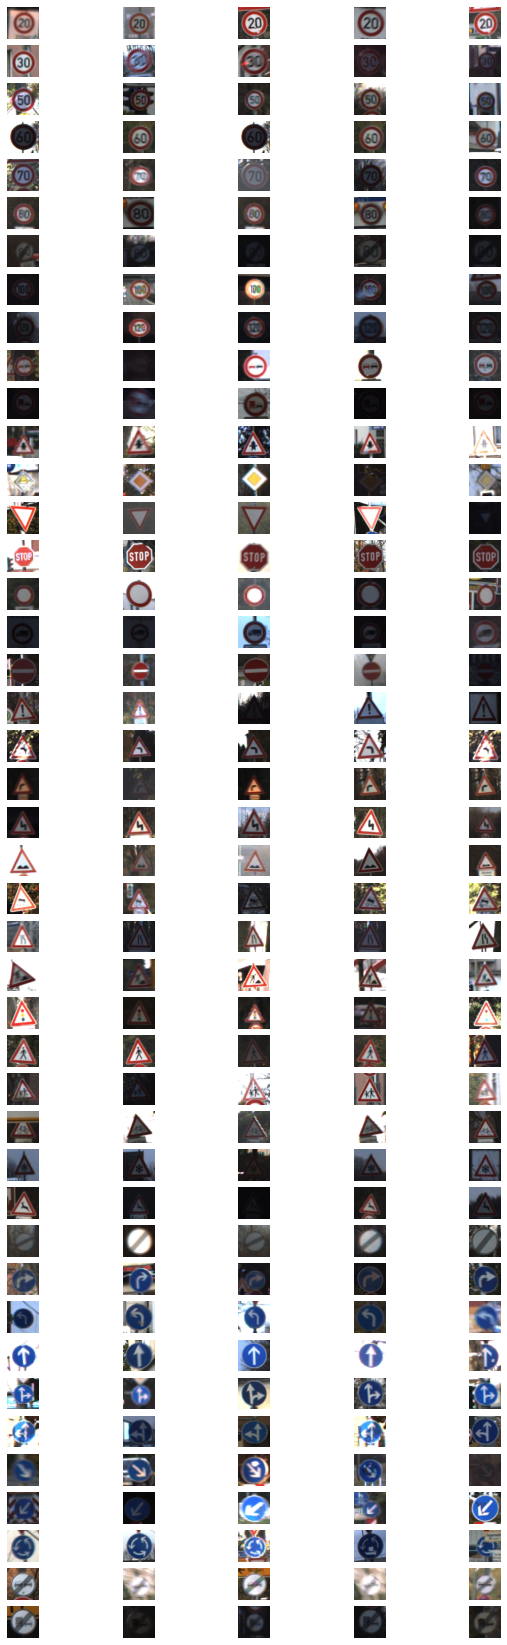

In [0]:
fig, axs = plt.subplots(nrows = 43, ncols= 5, figsize = (10,30))
for i in range(43):
    for j in range(5):
        axs[i][j].imshow(X_train[y_train==i][np.random.randint(0,len(X_train[y_train==i]))], cmap ='gray')
        axs[i][j].axis('off')
    print(i,' : ',len(X_train[y_train==i]))

In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
X_test.shape

(12630, 32, 32, 3)

In [0]:
X_val.shape

(4410, 32, 32, 3)

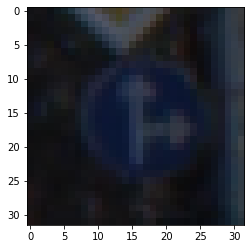

In [0]:
plt.imshow(X_train[1000])

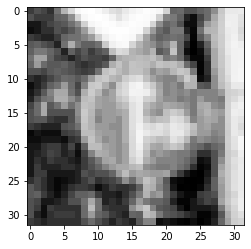

In [0]:
img = X_train[1000]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
plt.imshow(img, cmap='gray')

In [0]:
def img_preproc(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img/255

In [0]:
X_train = np.array(list(map(img_preproc, X_train)))
X_test = np.array(list(map(img_preproc, X_test)))
X_val = np.array(list(map(img_preproc, X_val)))

In [0]:
X_train.shape

(34799, 32, 32)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

In [0]:
X_train.shape

(34799, 32, 32, 1)

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, 43)
y_test = keras.utils.np_utils.to_categorical(y_test, 43)
y_val = keras.utils.np_utils.to_categorical(y_val, 43)

In [0]:
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)

In [0]:
datagen.fit(X_train)

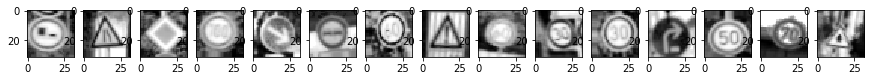

In [0]:
x , y = next(datagen.flow(X_train, y_train, batch_size = 15))

fig, axes = plt.subplots(1,15, figsize=(15,5))

for i in range(15):
    axes[i].imshow(x[i].reshape(32,32), cmap='gray')

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape = (32,32,1)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))

model.add(Dense(43, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100), 
                        steps_per_epoch=1000, epochs=10, 
                        validation_data=(X_val, y_val), verbose=1)

Epoch 1/15
1000/1000 [==============================] - 29s 29ms/step - loss: 0.9090 - acc: 0.7345 - val_loss: 0.1303 - val_acc: 0.9587
Epoch 2/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.1437 - acc: 0.9550 - val_loss: 0.0593 - val_acc: 0.9807
Epoch 3/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0841 - acc: 0.9738 - val_loss: 0.0392 - val_acc: 0.9889
Epoch 4/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0697 - acc: 0.9784 - val_loss: 0.0630 - val_acc: 0.9812
Epoch 5/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0538 - acc: 0.9837 - val_loss: 0.0392 - val_acc: 0.9875
Epoch 6/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0476 - val_acc: 0.9862
Epoch 7/15
1000/1000 [==============================] - 28s 28ms/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0386 - val_acc: 0.9884
Epoch 8/15
1000/1000 [==========================

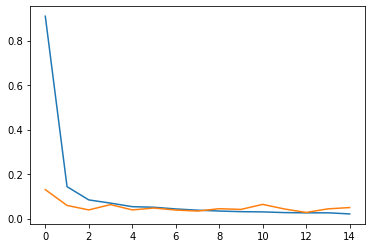

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

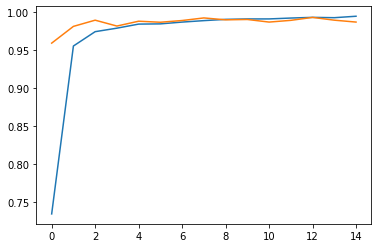

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [0]:
model.evaluate(X_test, y_test)

12630/12630 [==============================] - 1s 77us/step


[0.21024619674477027, 0.9604117181503102]